# Blood Glucose Control - EDA

**Name:** Andrew Yang



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [2]:
import pandas as pd

df = pd.read_csv('../data/gluroo_500030.csv')
df['patient_id'] = 500030

second_df = pd.read_csv('../data/gluroo_679372.csv')
second_df['patient_id'] = 679372

df = pd.concat([df, second_df])
df['interval'] = df['date'].apply(lambda x: x[27:29]) # trimming the head
df['date'] = df['date'].apply(lambda x: x[:19]) # trimming the tail
  %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

In [3]:
import matplotlib.pyplot as plt

/var/folders/yc/fj0w5k890gjbcm5p5bkv9vs40000gn/T/ipykernel_96398/3070834447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat1['healthy'] = df_pat1['bgl'].apply(lambda x: 'In range (70-180 mg/dL)' if 70 <= x <= 180
/var/folders/yc/fj0w5k890gjbcm5p5bkv9vs40000gn/T/ipykernel_96398/3070834447.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pat2['healthy'] = df_pat2['bgl'].apply(lambda x: 'In range (70-180 mg/dL)' if 70 <= x <= 180


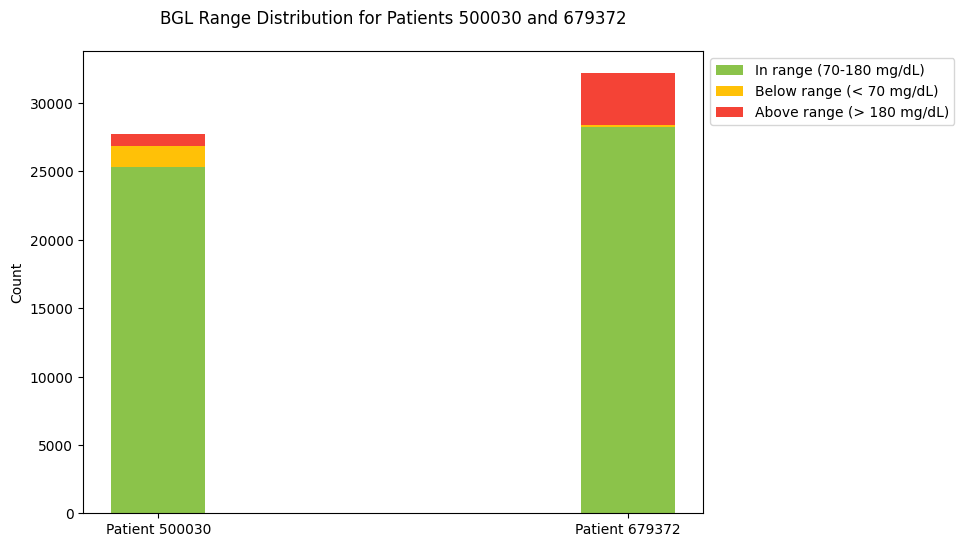

In [27]:
# df_reading = df[df['__typename'] == 'Reading']
df_pat1 = df[df['patient_id'] == 500030]
df_pat2 = df[df['patient_id'] == 679372]

df_pat1['healthy'] = df_pat1['bgl'].apply(lambda x: 'In range (70-180 mg/dL)' if 70 <= x <= 180 
                                           else 'Below range (< 70 mg/dL)' if x < 70 
                                           else 'Above range (> 180 mg/dL)')
df_pat2['healthy'] = df_pat2['bgl'].apply(lambda x: 'In range (70-180 mg/dL)' if 70 <= x <= 180 
                                           else 'Below range (< 70 mg/dL)' if x < 70 
                                           else 'Above range (> 180 mg/dL)')
counts_pat1 = df_pat1['healthy'].value_counts()
counts_pat2 = df_pat2['healthy'].value_counts()


plt.figure(figsize=(8, 6))

colors = ['#8BC34A', '#FFC107', '#F44336']  # Green for "In range", Yellow for "Below", Red for "Above"

# Bar for Patient 500030
plt.bar('Patient 500030', counts_pat1['In range (70-180 mg/dL)'], color=colors[0], label='In range (70-180 mg/dL)', width=0.2)
plt.bar('Patient 500030', counts_pat1['Below range (< 70 mg/dL)'], bottom=counts_pat1['In range (70-180 mg/dL)'], color=colors[1], label='Below range (< 70 mg/dL)',width=0.2)
plt.bar('Patient 500030', counts_pat1['Above range (> 180 mg/dL)'], bottom=counts_pat1['In range (70-180 mg/dL)'] + counts_pat1['Below range (< 70 mg/dL)'], color=colors[2], label='Above range (> 180 mg/dL)',width=0.2)

# Bar for Patient 679372
plt.bar('Patient 679372', counts_pat2['In range (70-180 mg/dL)'], color=colors[0],width=0.2)
plt.bar('Patient 679372', counts_pat2['Below range (< 70 mg/dL)'], bottom=counts_pat2['In range (70-180 mg/dL)'], color=colors[1],width=0.2)
plt.bar('Patient 679372', counts_pat2['Above range (> 180 mg/dL)'], bottom=counts_pat2['In range (70-180 mg/dL)'] + counts_pat2['Below range (< 70 mg/dL)'], color=colors[2],width=0.2)

plt.title('BGL Range Distribution for Patients 500030 and 679372', pad=20)
plt.ylabel('Count')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.tight_layout()
plt.show()

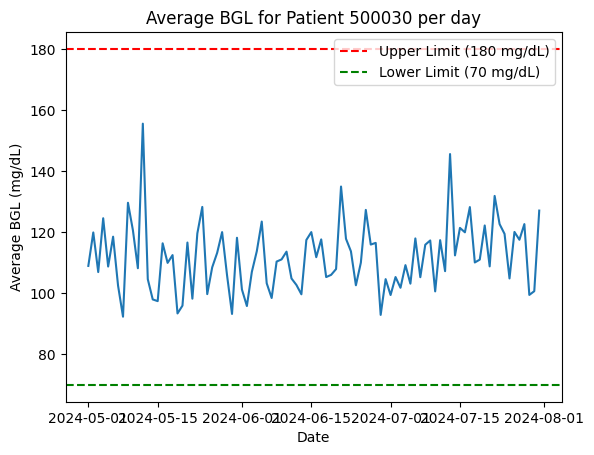

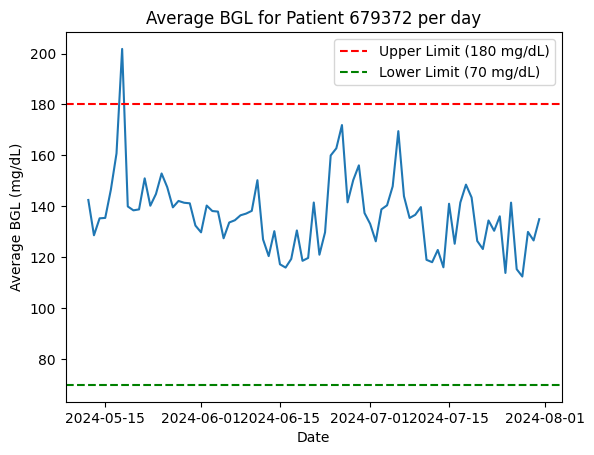

In [14]:
import numpy as np

df_reading = df[df['__typename'] == 'Reading']
df_pat1 = df_reading[df_reading['patient_id'] == 500030]
df_pat2 = df_reading[df_reading['patient_id'] == 679372]

day_avg_pat1 = []

for date, group in df_pat1.groupby(df_pat1['date'].dt.date):
    day_avg_pat1.append(np.average(group['bgl']))

plt.plot(df_pat1['date'].dt.date.unique(), day_avg_pat1)
plt.title('Average BGL for Patient 500030 per day')
plt.axhline(y=180, color='r', linestyle='--', label='Upper Limit (180 mg/dL)')
plt.axhline(y=70, color='g', linestyle='--', label='Lower Limit (70 mg/dL)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average BGL (mg/dL)')
plt.show()

day_avg_pat2 = []

for date, group in df_pat2.groupby(df_pat2['date'].dt.date):
    day_avg_pat2.append(np.average(group['bgl']))

plt.plot(df_pat2['date'].dt.date.unique(), day_avg_pat2)
plt.title('Average BGL for Patient 679372 per day')
plt.axhline(y=180, color='r', linestyle='--', label='Upper Limit (180 mg/dL)')
plt.axhline(y=70, color='g', linestyle='--', label='Lower Limit (70 mg/dL)')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average BGL (mg/dL)')
plt.show()

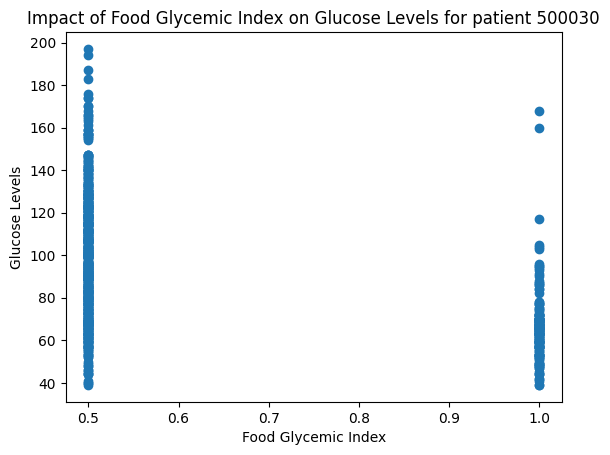

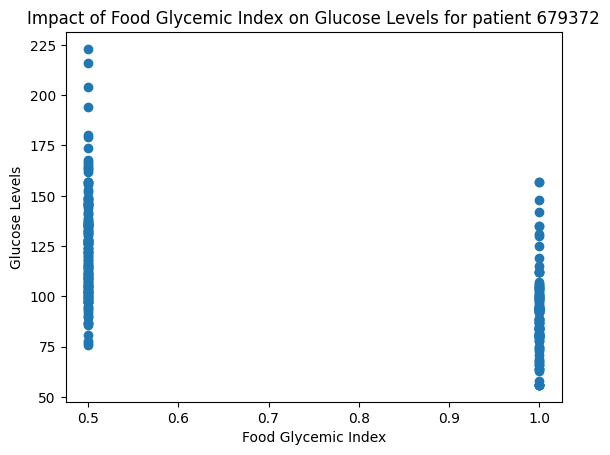

In [6]:
#  Impact of Food Glycemic Index on Glucose Levels

df_pat1 = df[df['patient_id'] == 500030]
df_pat2 = df[df['patient_id'] == 679372]

plt.scatter(df_pat1['food_glycemic_index'], df_pat1['bgl'])
plt.xlabel('Food Glycemic Index')
plt.ylabel('Glucose Levels')
plt.title('Impact of Food Glycemic Index on Glucose Levels for patient 500030')
plt.show()

#  Impact of Food Glycemic Index on Glucose Levels

plt.scatter(df_pat2['food_glycemic_index'], df_pat2['bgl'])
plt.xlabel('Food Glycemic Index')
plt.ylabel('Glucose Levels')
plt.title('Impact of Food Glycemic Index on Glucose Levels for patient 679372')
plt.show()

### From the above plot, we can conclude that the impact of food glycemic index on glucose level has no relationship.

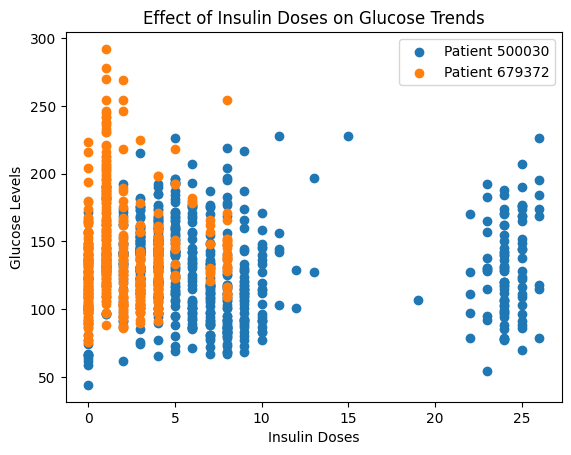

In [7]:
plt.scatter(df_pat1['dose_units'], df_pat1['bgl'], label='Patient 500030')
plt.scatter(df_pat2['dose_units'], df_pat2['bgl'], label='Patient 679372')
plt.xlabel('Insulin Doses')
plt.ylabel('Glucose Levels')
plt.title('Effect of Insulin Doses on Glucose Trends')
plt.legend()
plt.show()

### Analysis from Effect of Insulin Dose on Glucose Trends Plot

For both patients, the general trend indicates that glucose levels tend to decrease with increasing insulin doses, though the decrease is not perfectly linear.

Patient 500030 seems to experience higher glucose fluctuations at lower insulin doses compared to Patient 679372, possibly indicating a higher insulin resistance or variability in glucose control.

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Based on the timestamp data (bgl_date_millis), can we design a real-time alert system to warn users of impending blood glucose anomalies?
2. How do the variables like food_glycemic_index and food_g affect blood glucose levels? Can we build a model to predict these interactions?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`